# MLflow with Microsoft Azure Machine Learning.

MLflow is an open source platform used to manage machine learning lifecycle, including experimentation, reproducibility, deployment and a central model registery. They are characterized by four components: MLflow Tracking (record and query experiments), MLflow Projects (packaging of code for easy reproducibility), MLflow Models (deploying ML models in different environments) and MLflow Registery (sotring, annotating, discovering and managing mdoels in a central repository). Refer [this](https://mlflow.org/) link for more details. Refer [video 1](https://databricks.com/session_eu19/mlflow-and-azure-machine-learning-the-power-couple-for-ml-lifecycle-management), [video 2](https://www.youtube.com/watch?v=2DLG1yo8JxM) and [this link](https://docs.microsoft.com/en-us/azure/machine-learning/how-to-use-mlflow) to get an idea about why and how to use MLflow with Azure ML.

This notebook demonstates how one could integrate MLflow with Microsoft Azure ML so that we can leverage the advanatages of both platforms.

In [1]:
# importing necessary libraries
# refer to the requirements.txt file to know the dependencies

import os
import json
import mlflow
import azureml.core
from dotenv import load_dotenv
from azureml.core import Workspace
from azureml.mlflow import get_portal_url
from IPython.core.display import display, HTML

print(f"Azure-core Python SDK version -> {azureml.core.VERSION}")
print(f"MLflow version -> {mlflow.version.VERSION}")
load_dotenv()

Azure-core Python SDK version -> 1.28.0
MLflow version -> 1.17.0


True

In [2]:
# fetching our workspace

workspace = Workspace.get(name=os.getenv("WORKSPACE_NAME", None),
                          subscription_id=os.getenv("SUBSCRIPTION_ID", None),
                          resource_group=os.getenv("RESOURCE_GROUP", None))
print(f'''Workspace name: {workspace.name}\nWorkspace region: {workspace.location}\nWorkspace subscription ID: {workspace.subscription_id[:3]}---xxxx---{workspace.subscription_id[-3:]}\nWorkspace resource group: {workspace.resource_group}''')

Workspace name: ML_WORKSPACE_VERSION_1
Workspace region: centralindia
Workspace subscription ID: 200---xxxx---ee2
Workspace resource group: ML_VERSION_1


In [3]:
# linking MLflow tracking to the Azure ML workspace (basically, exchanging information between MLflow and Azure ML).

mlflow.set_tracking_uri(uri=workspace.get_mlflow_tracking_uri())

In [4]:
# setting up an experiment

experiment_name = "digit-recognizer-mlflow-experiment-2"
experiment = mlflow.set_experiment(experiment_name=experiment_name)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


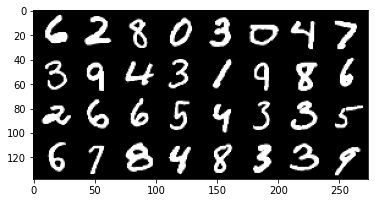


DEVICE - cuda || EPOCHS - 10 || LEARNING RATE - 0.001.


EPOCH - 1/10 || START AT - 20:42:27 21|05|2021 || LEARNING RATE - 0.001

	Train Step - 500/1875 | Train Step Loss: 2.24745 | Time: 3.15s.

	Train Step - 1000/1875 | Train Step Loss: 0.72464 | Time: 3.13s.

	Train Step - 1500/1875 | Train Step Loss: 0.37702 | Time: 3.15s.

	EPOCH - 1/10 || TRAIN LOSS - 0.95497 || TIME ELAPSED - 12.29s.


EPOCH - 2/10 || START AT - 20:42:39 21|05|2021 || LEARNING RATE - 0.001

	Train Step - 500/1875 | Train Step Loss: 0.25254 | Time: 3.25s.

	Train Step - 1000/1875 | Train Step Loss: 0.20950 | Time: 3.07s.

	Train Step - 1500/1875 | Train Step Loss: 0.19681 | Time: 3.06s.

	EPOCH - 2/10 || TRAIN LOSS - 0.20981 || TIME ELAPSED - 12.16s.


EPOCH - 3/10 || START AT - 20:42:51 21|05|2021 || LEARNING RATE - 0.001

	Train Step - 500/1875 | Train Step Loss: 0.15631 | Time: 3.06s.

	Train Step - 1000/1875 | Train Step Loss: 0.13523 | Time: 3.05s.

	Train Step - 1500/1875 | Train Step Loss: 0.12929 | Time:

In [9]:
# running the experiment

with mlflow.start_run() as run:
    display(HTML(f"<a href={get_portal_url(run)} target='_blank'>Click the link to checkout the Azure ML run details : {run.info.run_uuid}</a>"))
    %run train_cloud.py --mlflow True

In [7]:
# running the project

backend_config = None
with open("backend_config.json") as f:
    backend_config = json.load(f)
mlflow_project_run = mlflow.projects.run(uri='.',
                                         parameters={"learning_rate": 1e-2, "momentum": 0.9, "mlflow": True},
                                         backend="azureml",
                                         backend_config=backend_config)

Class AzureMLProjectBackend: This is an experimental class, and may change at any time. Please see https://aka.ms/azuremlexperimental for more information.
2021/05/22 11:12:27 INFO mlflow.projects.utils: === Created directory /tmp/tmpmcwob52p for downloading remote URIs passed to arguments of type 'path' ===
'enabled' is deprecated. Please use the azureml.core.runconfig.DockerConfiguration object with the 'use_docker' param instead.
Submitting /media/tyche/E/ACTIVITIES/Co-curricular/AI mini projects/Lenet directory for run. The size of the directory >= 25 MB, so it can take a few minutes.
Class AzureMLSubmittedRun: This is an experimental class, and may change at any time. Please see https://aka.ms/azuremlexperimental for more information.


RunId: digit-recognizer-mlflow-experiment-2_1621662151_ba1f4185
Web View: https://ml.azure.com/runs/digit-recognizer-mlflow-experiment-2_1621662151_ba1f4185?wsid=/subscriptions/2006ce9b-738e-4ab3-82ce-eb92cd6cbee2/resourcegroups/ML_VERSION_1/workspaces/ML_WORKSPACE_VERSION_1&tid=1d331154-fec8-49f7-a7ca-7c22a79641cb

Streaming azureml-logs/20_image_build_log.txt

2021/05/22 05:43:06 Downloading source code...
2021/05/22 05:43:07 Finished downloading source code
2021/05/22 05:43:08 Creating Docker network: acb_default_network, driver: 'bridge'
2021/05/22 05:43:08 Successfully set up Docker network: acb_default_network
2021/05/22 05:43:08 Setting up Docker configuration...
2021/05/22 05:43:09 Successfully set up Docker configuration
2021/05/22 05:43:09 Logging in to registry: mlworkspaceversion1.azurecr.io
2021/05/22 05:43:10 Successfully logged into mlworkspaceversion1.azurecr.io
2021/05/22 05:43:10 Executing step ID: acb_step_0. Timeout(sec): 5400, Working directory: '', Network: 'acb_d


_libgcc_mutex-0.1    | 3 KB      |            |   0% 
_libgcc_mutex-0.1    | 3 KB      | ########## | 100% 

tk-8.6.10            | 3.0 MB    |            |   0% 
tk-8.6.10            | 3.0 MB    | ########## | 100% 
tk-8.6.10            | 3.0 MB    | ########## | 100% 

certifi-2020.12.5    | 141 KB    |            |   0% 
certifi-2020.12.5    | 141 KB    | ########## | 100% 

setuptools-52.0.0    | 714 KB    |            |   0% 
setuptools-52.0.0    | 714 KB    | ########## | 100% 
setuptools-52.0.0    | 714 KB    | ########## | 100% 

libgcc-ng-9.1.0      | 5.1 MB    |            |   0% 
libgcc-ng-9.1.0      | 5.1 MB    | ###4       |  34% 
libgcc-ng-9.1.0      | 5.1 MB    | ########## | 100% 
libgcc-ng-9.1.0      | 5.1 MB    | ########## | 100% 

readline-8.1         | 362 KB    |            |   0% 
readline-8.1         | 362 KB    | ########## | 100% 
Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done
Inst

 ---> 60a6d417fe72
Step 16/18 : RUN if [ $SPARK_HOME ]; then /bin/bash -c '$SPARK_HOME/bin/spark-submit  /azureml-environment-setup/spark_cache.py'; fi
 ---> Running in 59ad76cba117
Removing intermediate container 59ad76cba117
 ---> 142c888146ac
Step 17/18 : ENV AZUREML_ENVIRONMENT_IMAGE True
 ---> Running in 8d83266260ec
Removing intermediate container 8d83266260ec
 ---> c27944c6a8b1
Step 18/18 : CMD ["bash"]
 ---> Running in a3b23e8a1988
Removing intermediate container a3b23e8a1988
 ---> e5029865036e
Successfully built e5029865036e
Successfully tagged mlworkspaceversion1.azurecr.io/azureml/azureml_e11020725ac5345992bdb9230c94d0e6:latest
Successfully tagged mlworkspaceversion1.azurecr.io/azureml/azureml_e11020725ac5345992bdb9230c94d0e6:1
2021/05/22 05:47:12 Successfully executed container: acb_step_0
2021/05/22 05:47:12 Executing step ID: acb_step_1. Timeout(sec): 5400, Working directory: '', Network: 'acb_default_network'
2021/05/22 05:47:12 Pushing image: mlworkspaceversion1.azurecr

3306300f7441: Pull complete
d5f61fd90197: Pull complete
3c91cee49561: Pull complete
3166a3588baf: Pull complete
386667a0fc79: Pull complete
289a718e99bd: Pull complete
b6542452bac4: Pull complete
81397b3a873d: Pull complete
2a13f0de6060: Pull complete
7b6b553ac3a1: Pull complete

Streaming azureml-logs/70_driver_log.txt

2021/05/22 05:58:37 Starting App Insight Logger for task:  runTaskLet
2021/05/22 05:58:37 Attempt 1 of http call to http://10.0.0.5:16384/sendlogstoartifacts/info
2021/05/22 05:58:37 Attempt 1 of http call to http://10.0.0.5:16384/sendlogstoartifacts/status
[2021-05-22T05:58:37.904814] Entering context manager injector.
[context_manager_injector.py] Command line Options: Namespace(inject=['ProjectPythonPath:context_managers.ProjectPythonPath', 'RunHistory:context_managers.RunHistory', 'TrackUserError:context_managers.TrackUserError'], invocation=['python train_cloud.py --learning_rate 0.01 --momentum 0.9 --mlflow True'])
Script type = COMMAND
[2021-05-22T05:58:39.23802

2021/05/22 11:34:22 INFO mlflow.projects: === Run (ID 'digit-recognizer-mlflow-experiment-2_1621662151_ba1f4185') succeeded ===
